# Testing raw_to_ingested.py

I've now written the function to convert the mpl files to the ingested format. This file will deal with:

For a given day:
+ load in the ingested file
+ load in the mpl files and turn them into their ingested format
+ perform a comparison of all data variables

TODO:
+ implement open_mf_mpl_inline : a function to inline open the binary mpl files without having to move them and then convert them to .nc files

## RESULTS

+ 11/02/2021 : succesful. However, this is to be expected as the function was developed with this data as reference.

In [1]:
# imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

import os

from raw_to_ingested import raw_to_ingested
from get_mpl_from_archive import get_mpl_from_archive

In [173]:
# directory setup

dir_raw = '/home/users/eeasm/_scripts/ICESat2/data/test_raw_to_ingested'
date = datetime.date(2020,11,27)


dir_ingested = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/ingested'
fname_ingested = f'smtmplpolX1.a1.{date.year:4}{date.month:02}{date.day:02}.000000.cdf'
fname_ingested = os.path.join(dir_ingested,fname_ingested)


# get the mpl from the archice
get_mpl_from_archive(dir_raw,date=date)

get_mpl_from_archive(dir_target='/home/users/eeasm/_scripts/ICESat2/data/test_raw_to_ingested', dir_mpl='/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw', date_range=None, date=datetime.date(2020, 11, 27), filenames_list=None, verbose=False)
         move_mplraw: 222222222222222222222222
  extract_from_mplgz: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111
      extract_mpl2nc: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111


## Datasets

In [174]:
dir_raw_mpl = os.path.join(dir_raw,'mpl')

ds_raw = raw_to_ingested(dir_raw_mpl,date)
ds_raw

0:00:03


<xarray.Dataset>
Dimensions:          (time: 17280, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2020-11-27T00:00:03 ... 2020-11-27...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2020-11-27T00:00:03
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 23:59:53
    hour             (time) float32 0.0008333 0.002222 0.003611 ... 24.0 24.0
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 4.609 4.608 4.61 4.61 ... 4.569 4.568 4.57
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.0 0.0 0.0032 ... 0.0 0.0016 0.0
    backscatter_2    (time, height) float32 0.0016 0.0016 0.0 ... 0.0 0.0 0.0032
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03

In [175]:
ds_ingested = xr.open_dataset(fname_ingested)
ds_ingested

<xarray.Dataset>
Dimensions:          (time: 17280, height: 1200)
Coordinates:
  * height           (height) float32 -2.998 -2.983 -2.968 ... 14.94 14.96 14.97
Dimensions without coordinates: time
Data variables: (12/19)
    base_time        datetime64[ns] ...
    time_offset      (time) timedelta64[ns] ...
    hour             (time) float32 ...
    nshots           (time) int32 ...
    rep_rate         (time) int32 ...
    energy           (time) float32 ...
    ...               ...
    initial_cbh      (time) float32 ...
    backscatter_1    (time, height) float32 ...
    backscatter_2    (time, height) float32 ...
    lat              float32 ...
    lon              float32 ...
    alt              float32 ...
Attributes:
    Date_created:              Mon Dec 07 21:40:50 2020 UTC
    Ingest_version:            $Id: dave_mpl.polarization.c,v 1.8 2015/09/24 ...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

## Comparisons

In [176]:
diff_dict = {}

### time vars

PROBLEMS:
+ `hour`: seems to be off by a concistent factor of a few thousand

In [177]:
# base_time
k = 'base_time'
print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

diff_dict[k] = [ds_raw[k].values - ds_ingested[k].values]

2020-11-27T00:00:03.000000000
2020-11-27T00:00:03.000000000
0 nanoseconds


difference: max = 0 nanoseconds
difference: min = 0 nanoseconds


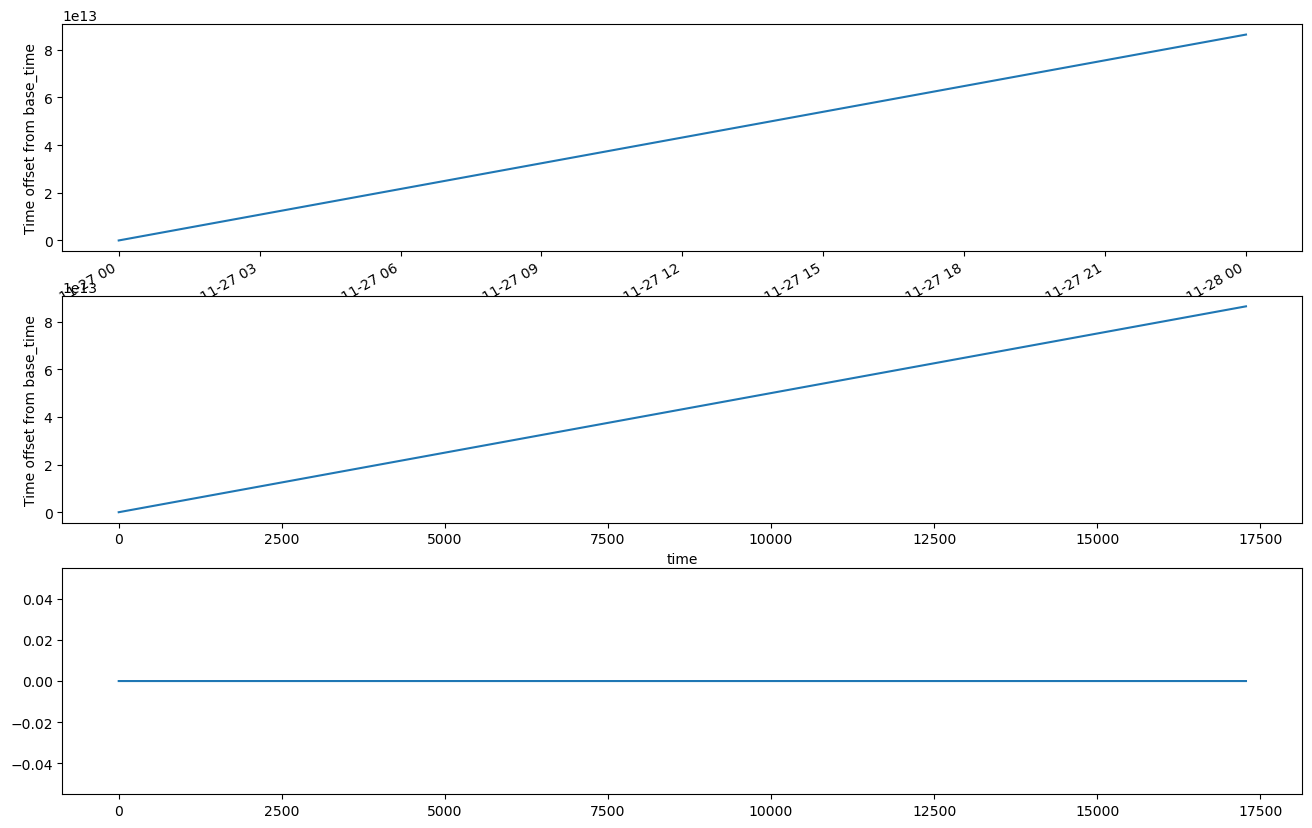

In [178]:
k = 'time_offset'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals)}')
print(f'difference: min = {np.min(vals)}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


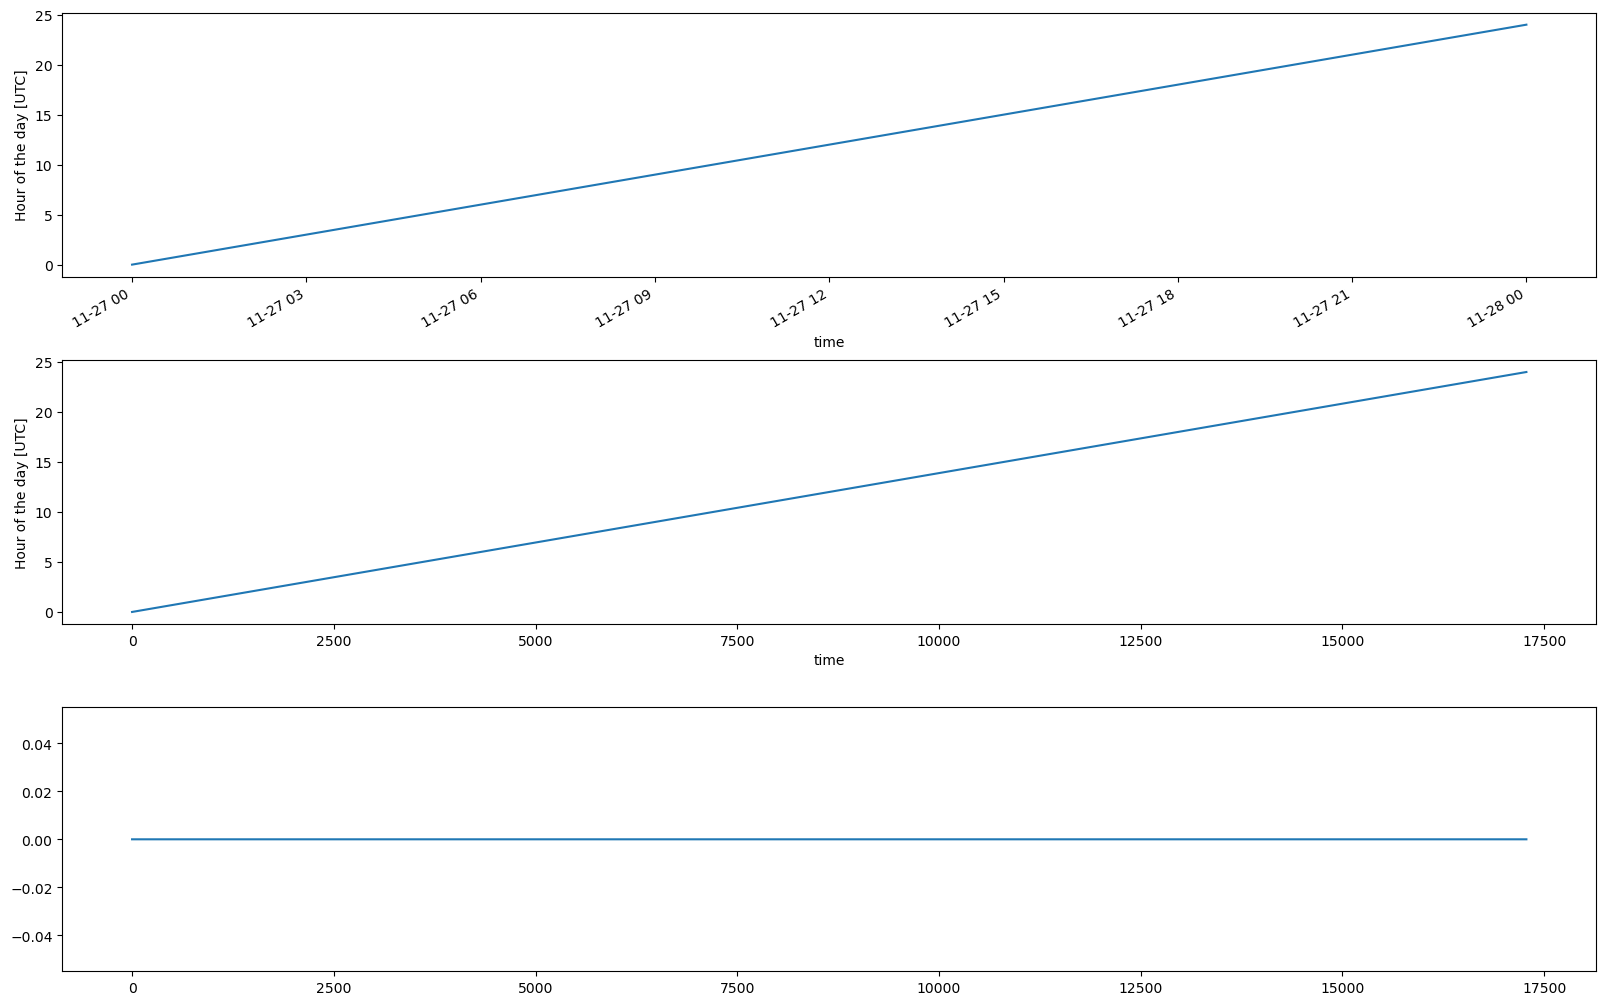

In [179]:
k = 'hour'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)

fig.tight_layout(pad=0.5)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

### general vars
`nshots`, `rep_rate`, `energy`, `initial_cbh`

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


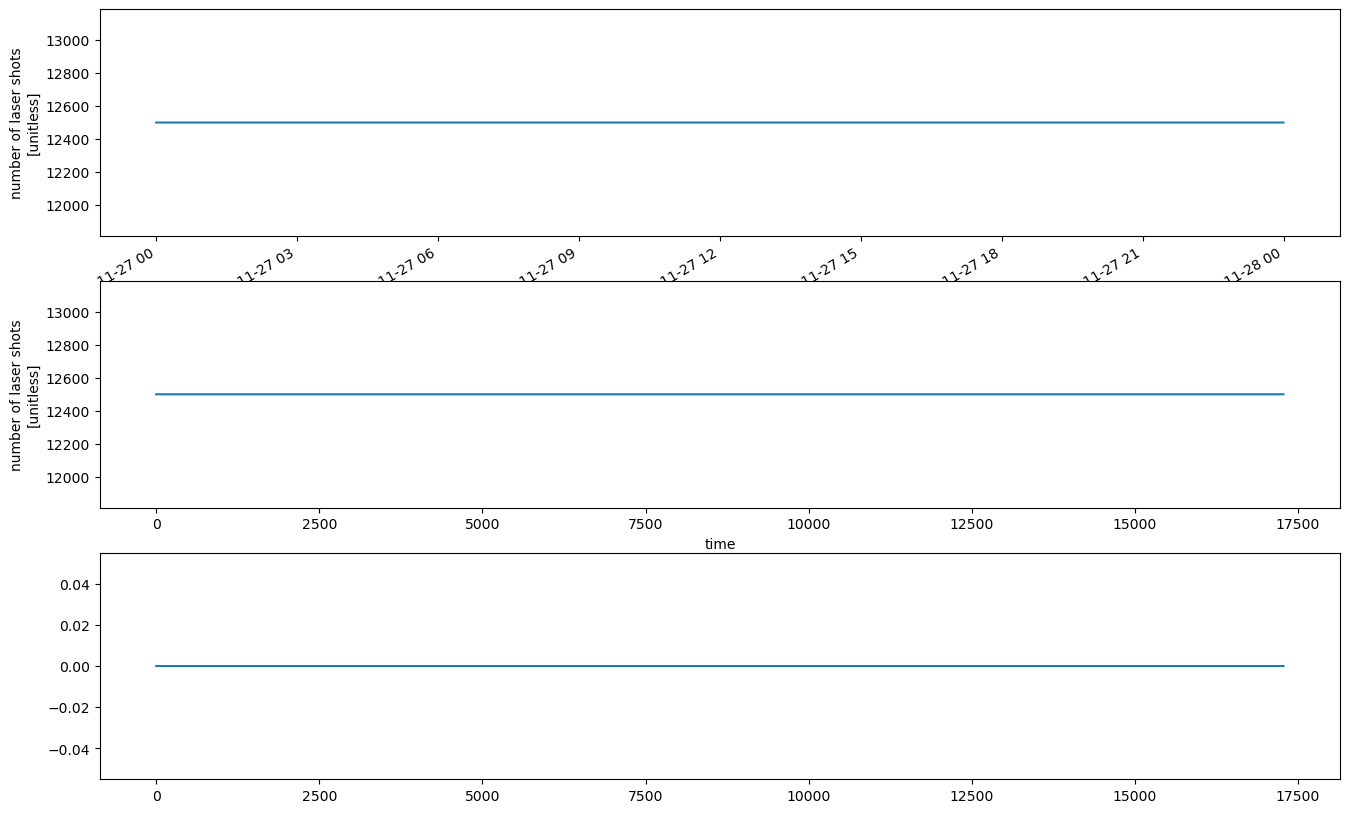

In [180]:
k = 'nshots'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


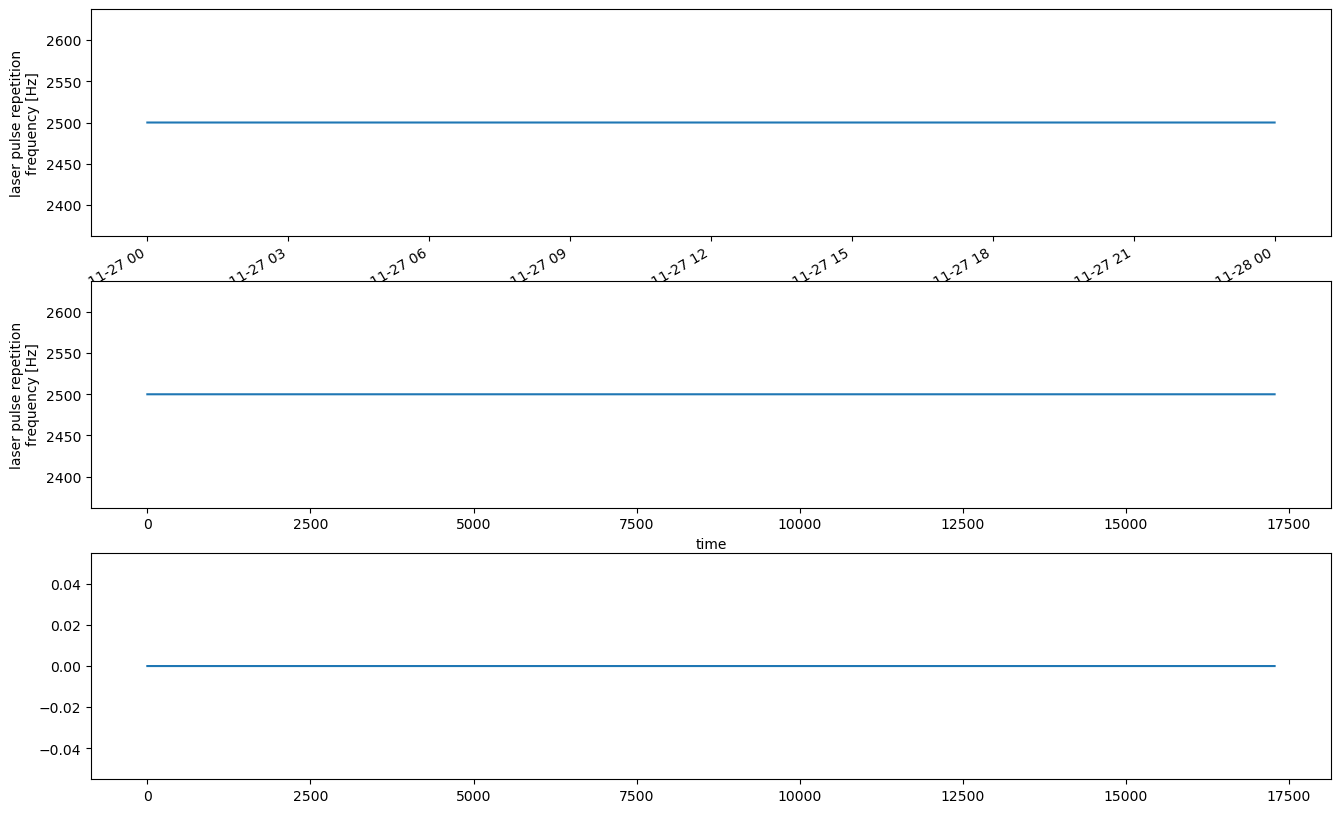

In [181]:
k = 'rep_rate'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


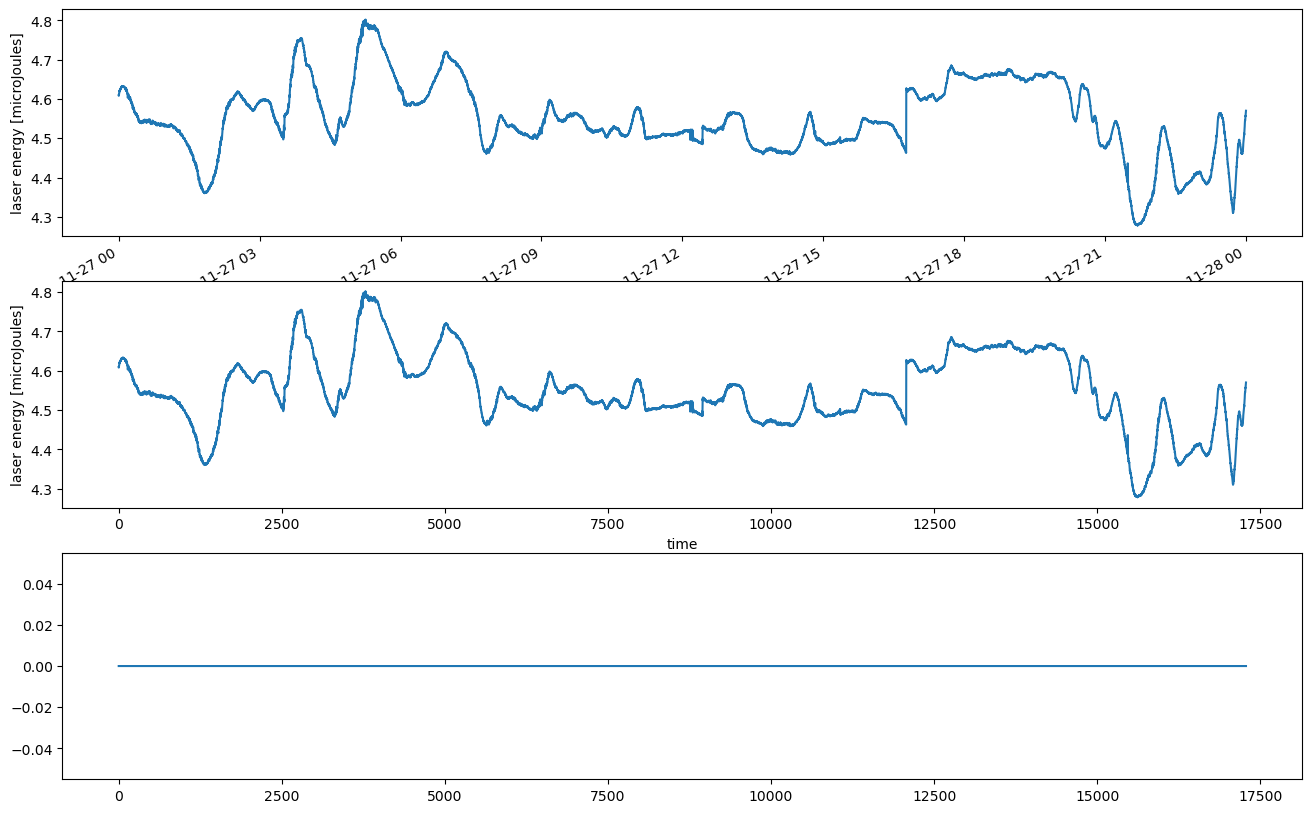

In [182]:
k = 'energy'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


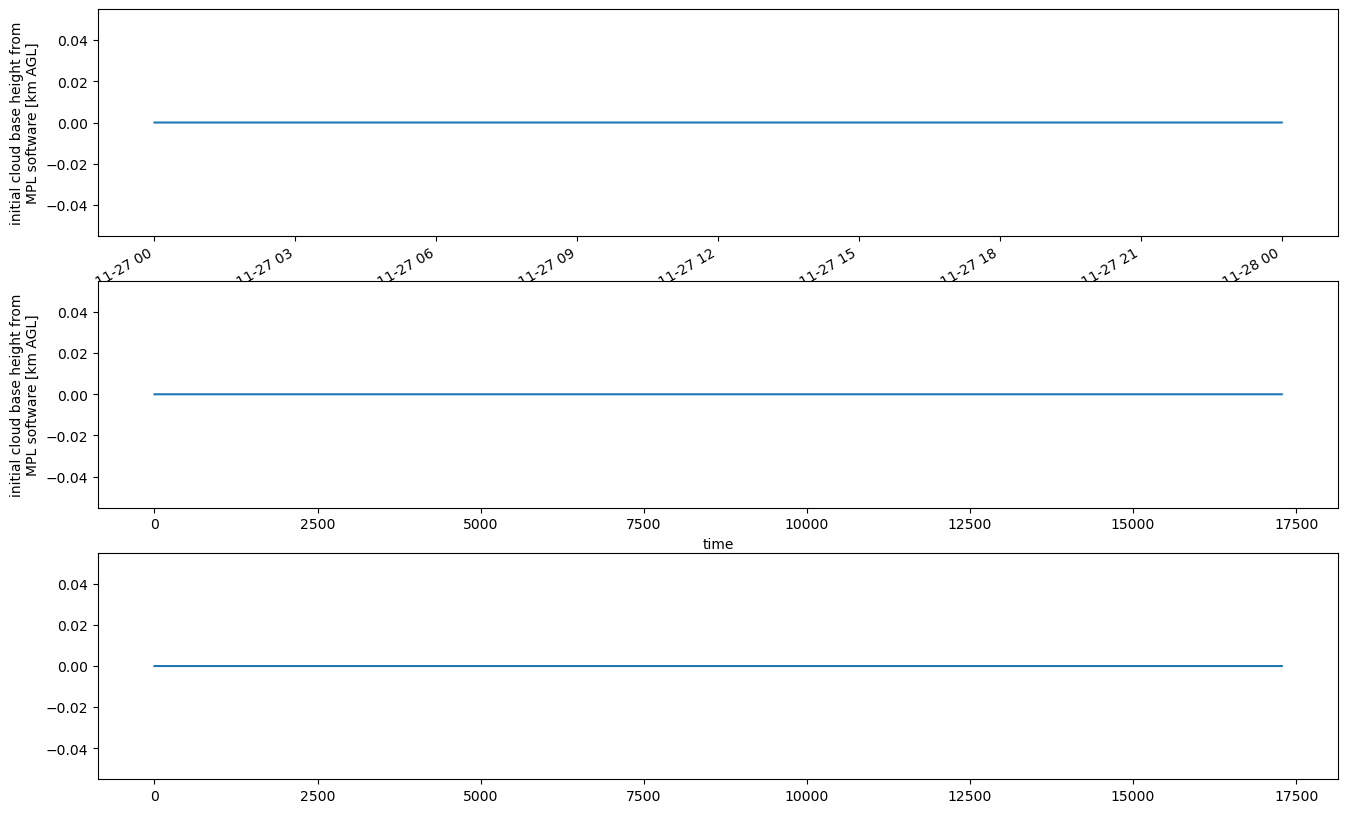

In [183]:
k = 'initial_cbh'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

### temperature vars

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


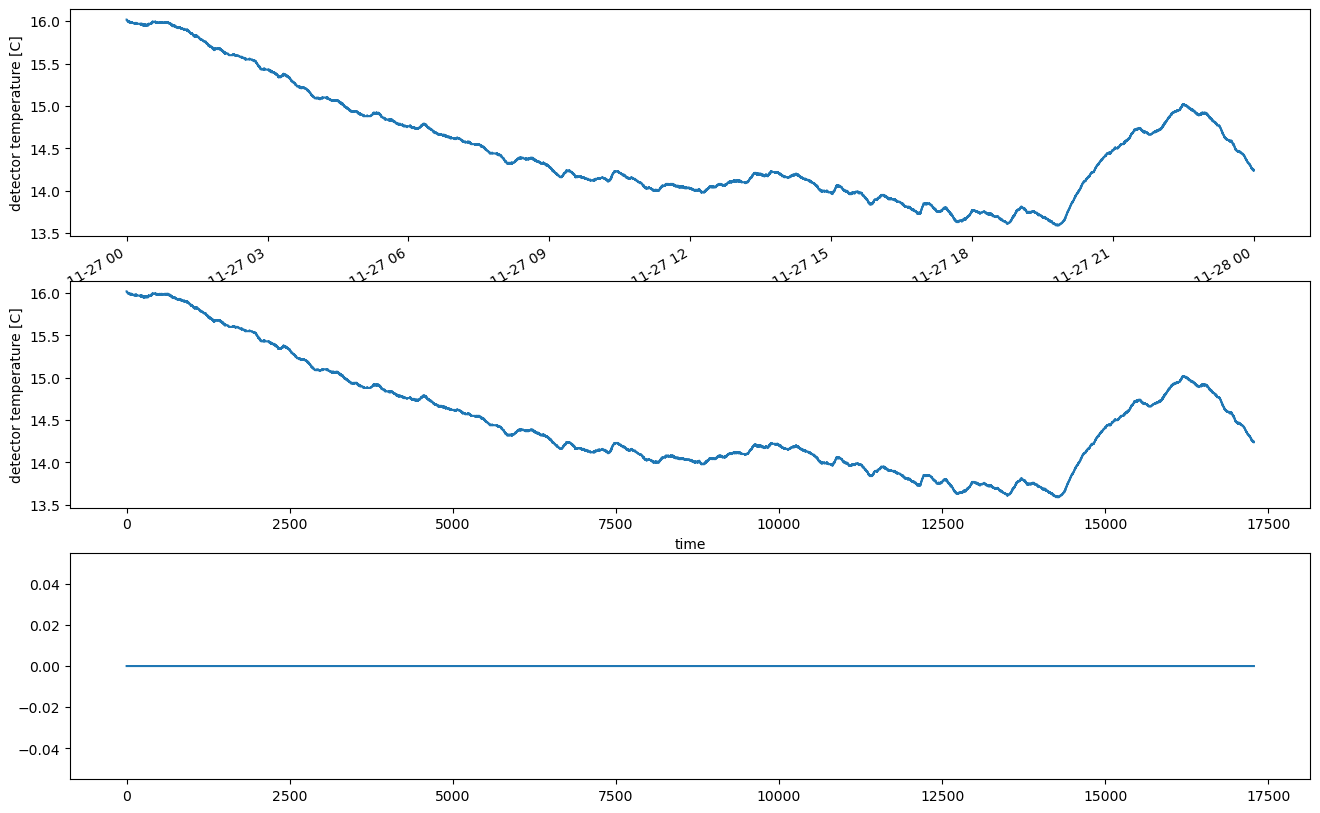

In [184]:
k = 'temp_detector'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


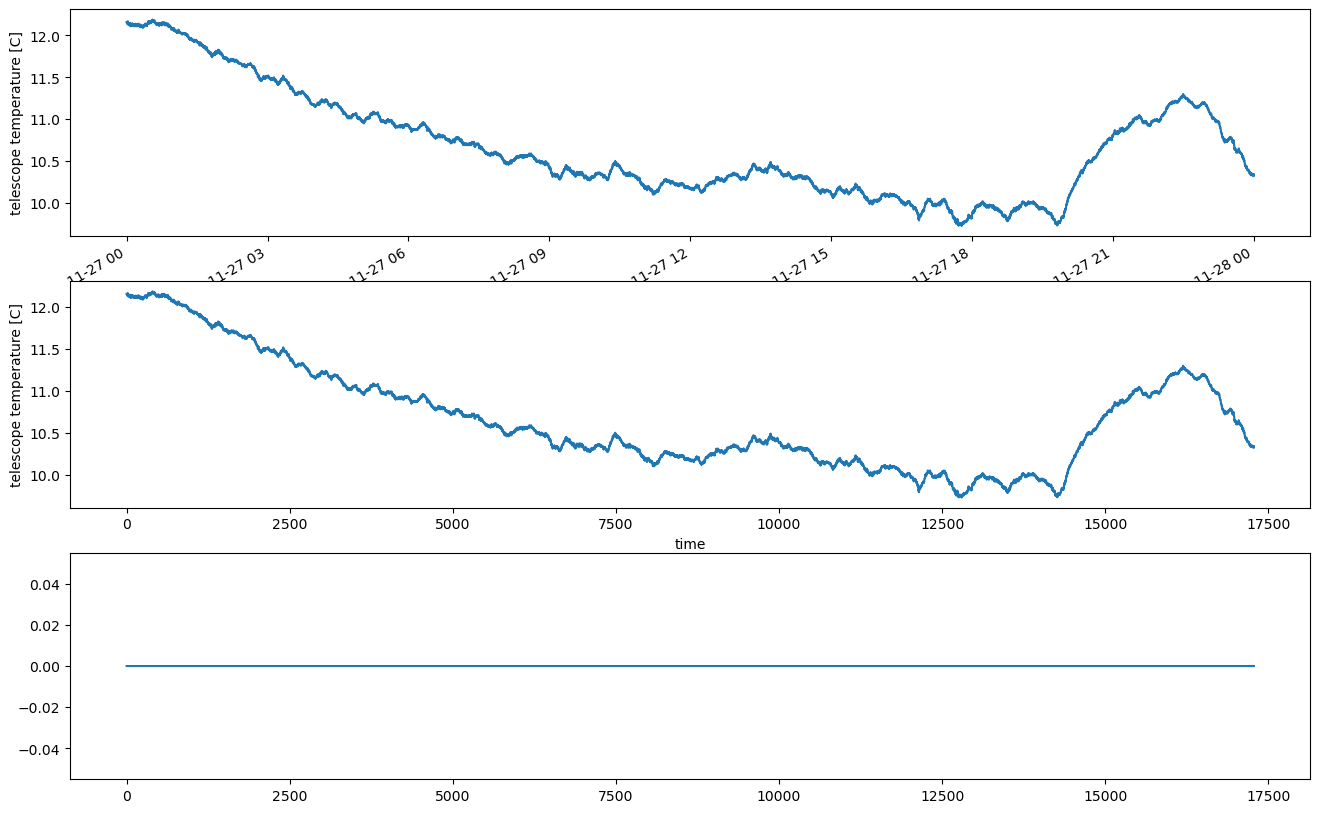

In [185]:
k = 'temp_telescope'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


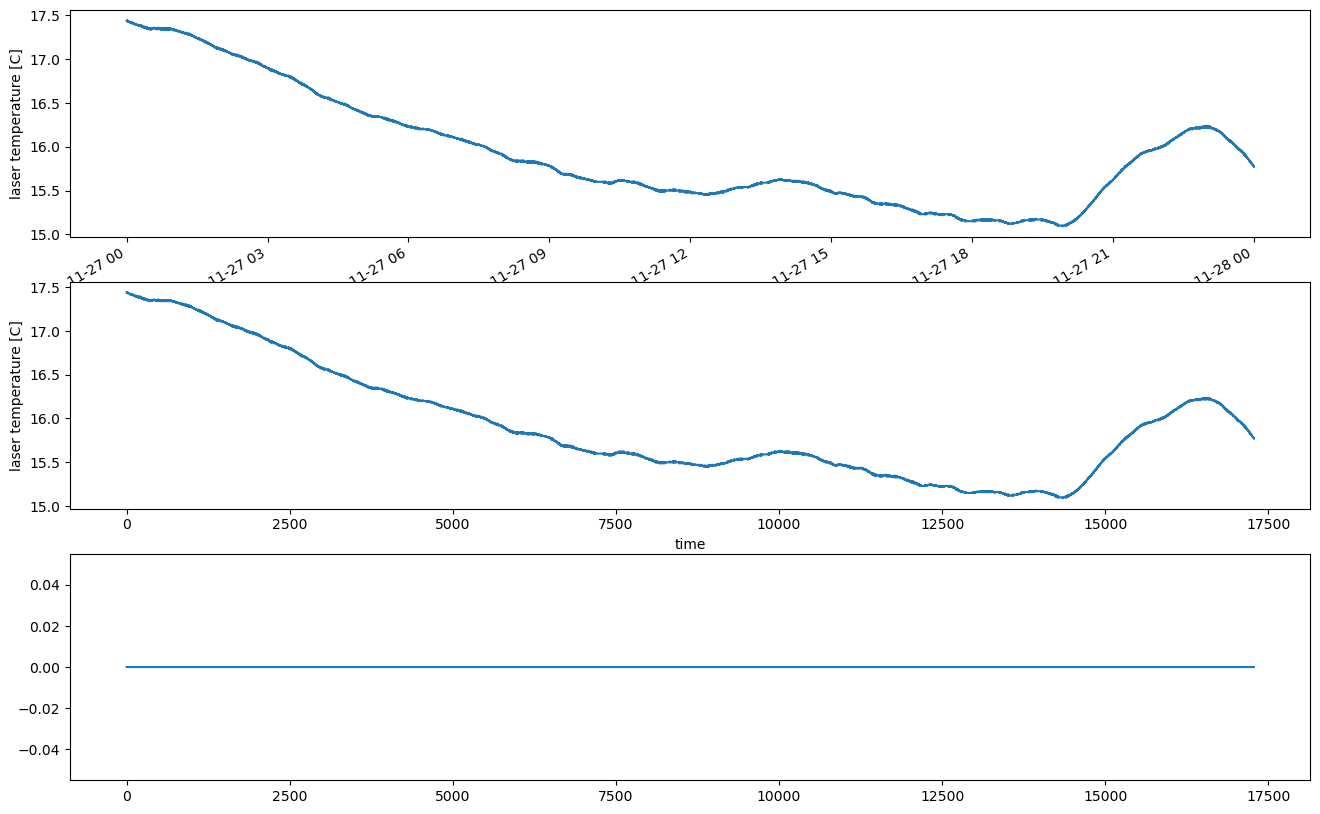

In [186]:
k = 'temp_laser'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

### background vars

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


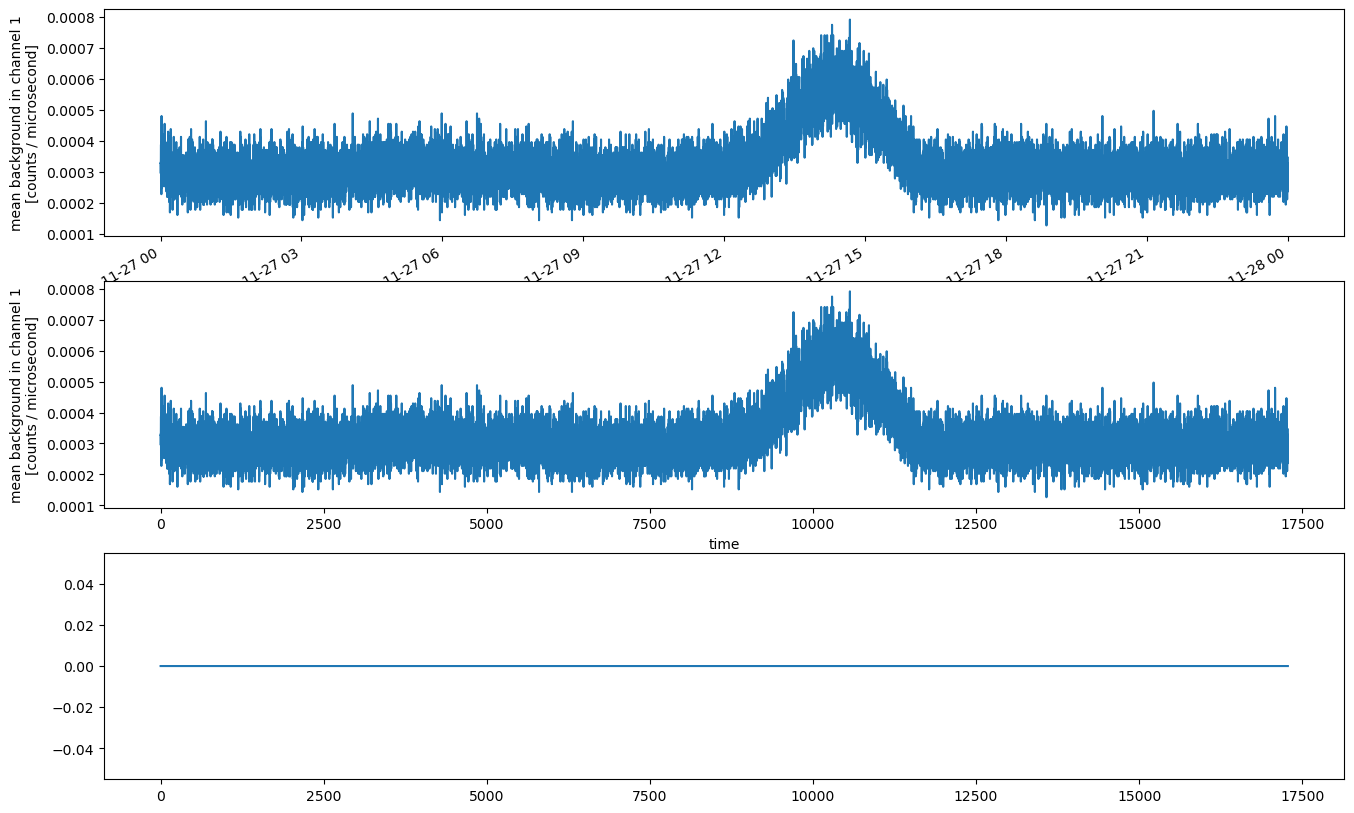

In [187]:
k = 'mn_background_1'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


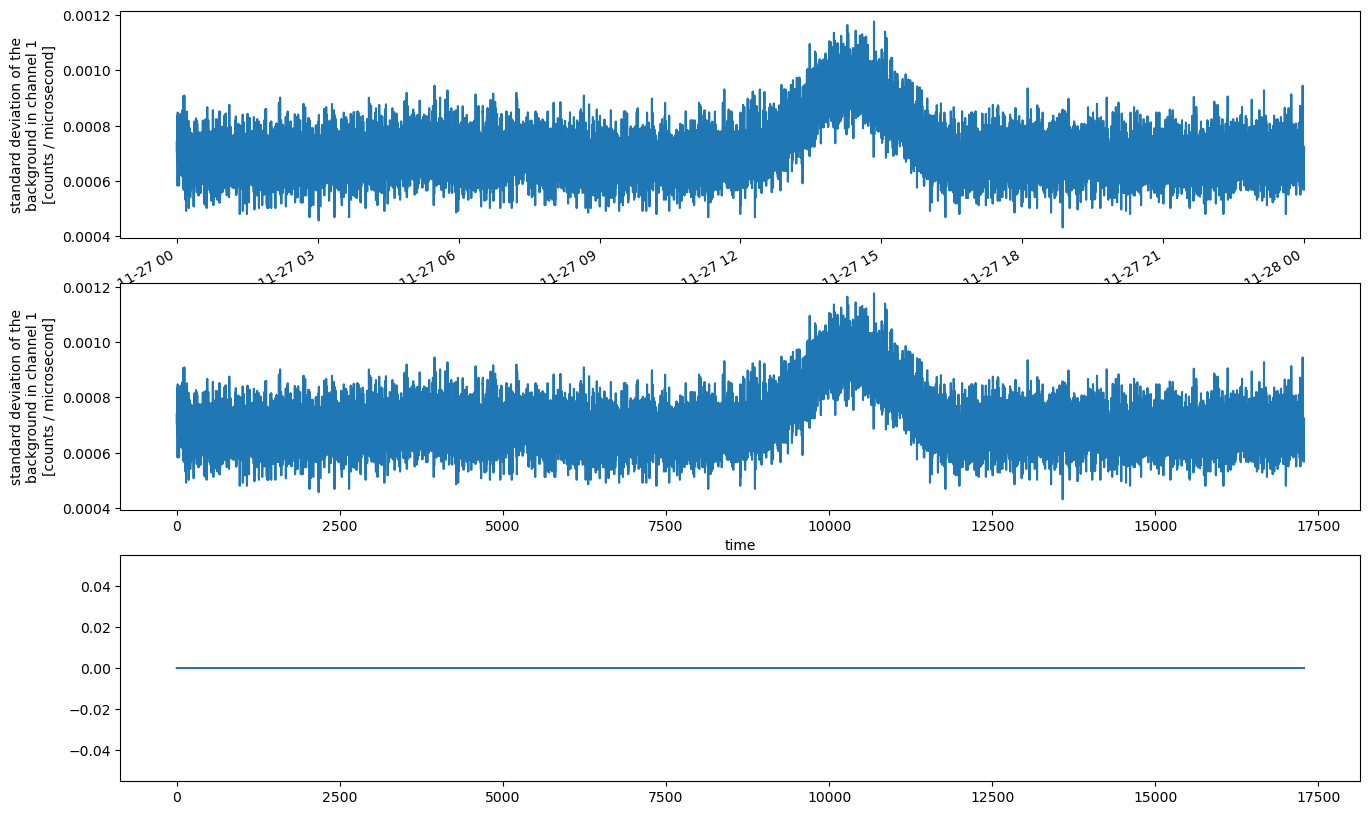

In [188]:
k = 'sd_background_1'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


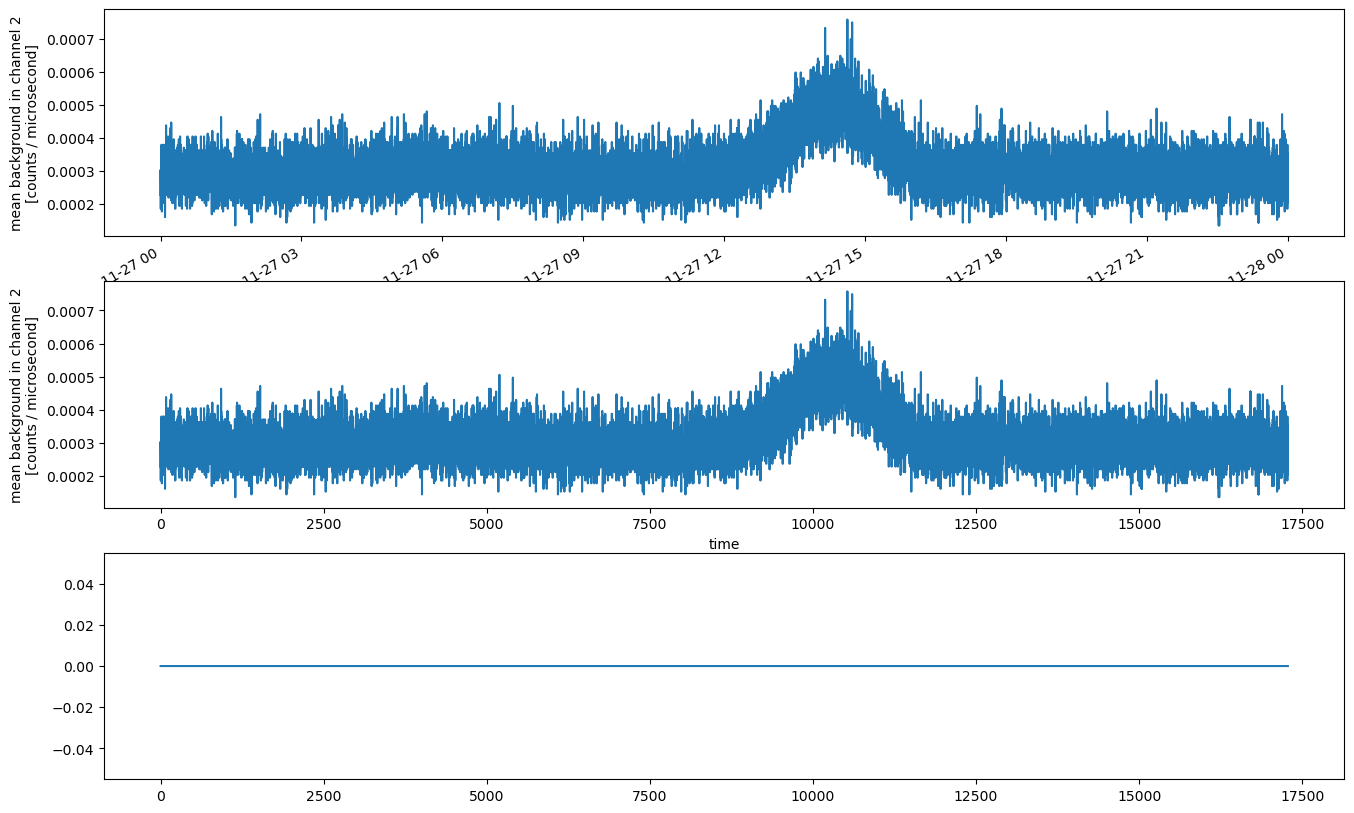

In [189]:
k = 'mn_background_2'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


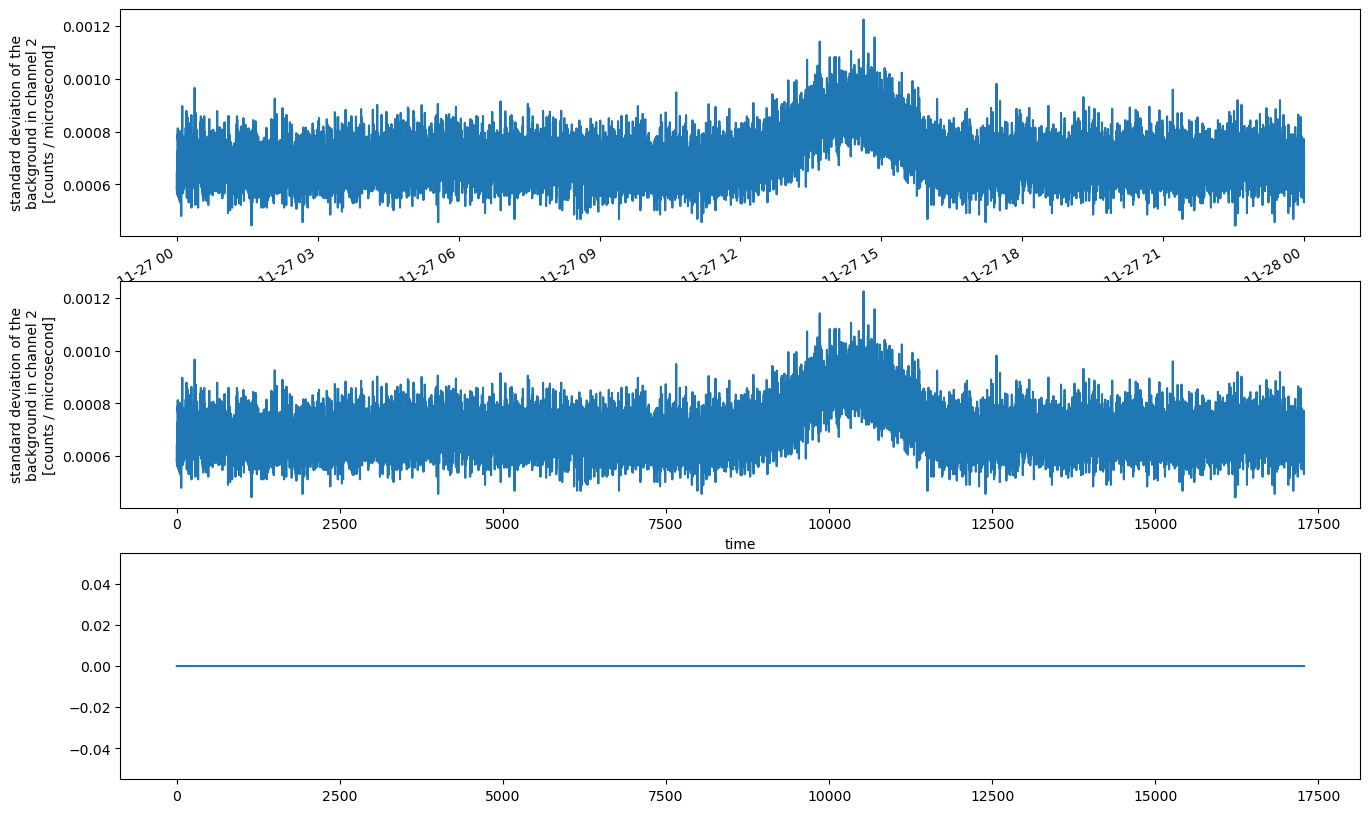

In [190]:
k = 'sd_background_2'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

### backscatter vars

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


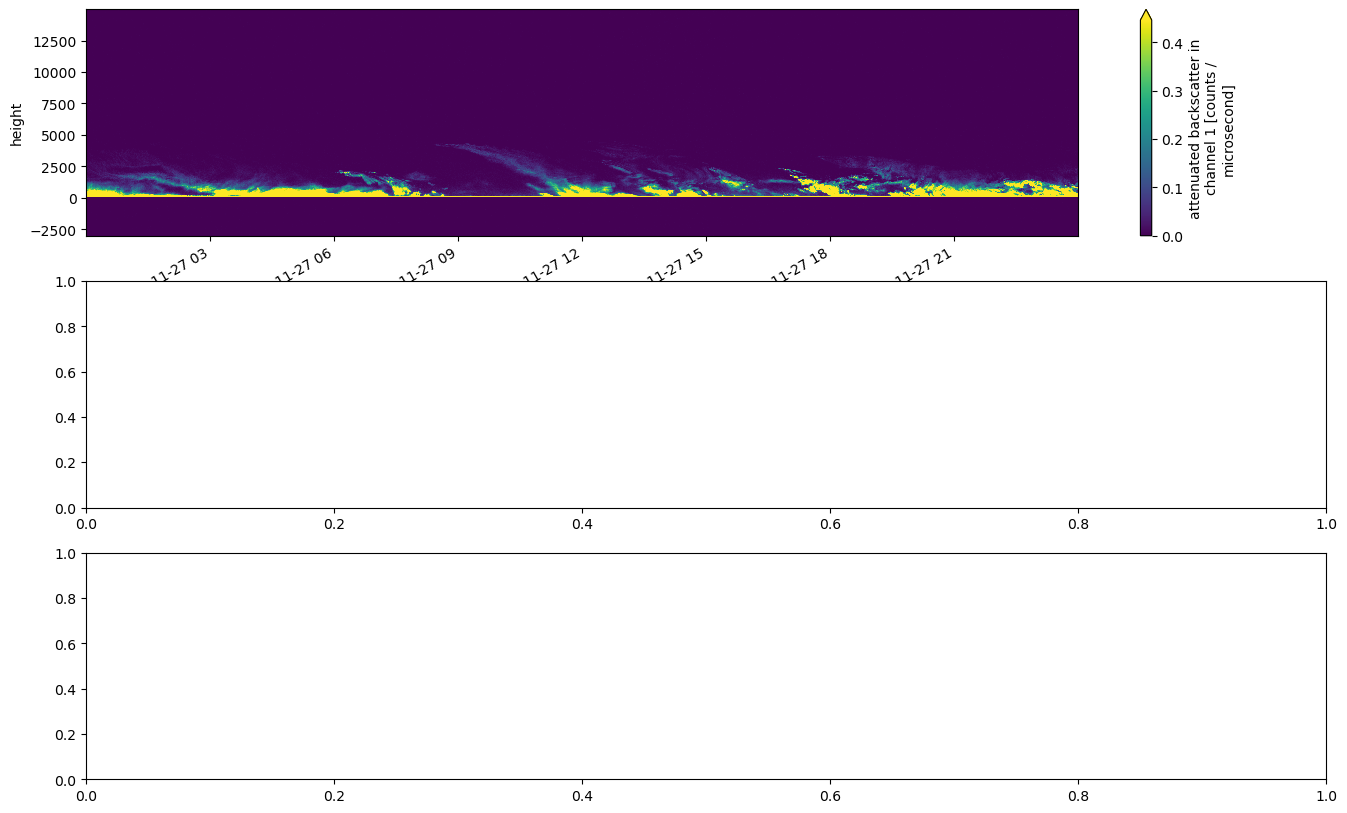

In [191]:
k = 'backscatter_1'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0], robust=True, x='time')
#ds_ingested[k].plot(ax=axs[1], robust=True, x='time')

vals = (ds_raw[k].values - ds_ingested[k].values)
ds_raw['diff1'] = (('time','height'),vals)

#ds_raw['diff1'].plot(ax=axs[2], x='time')
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


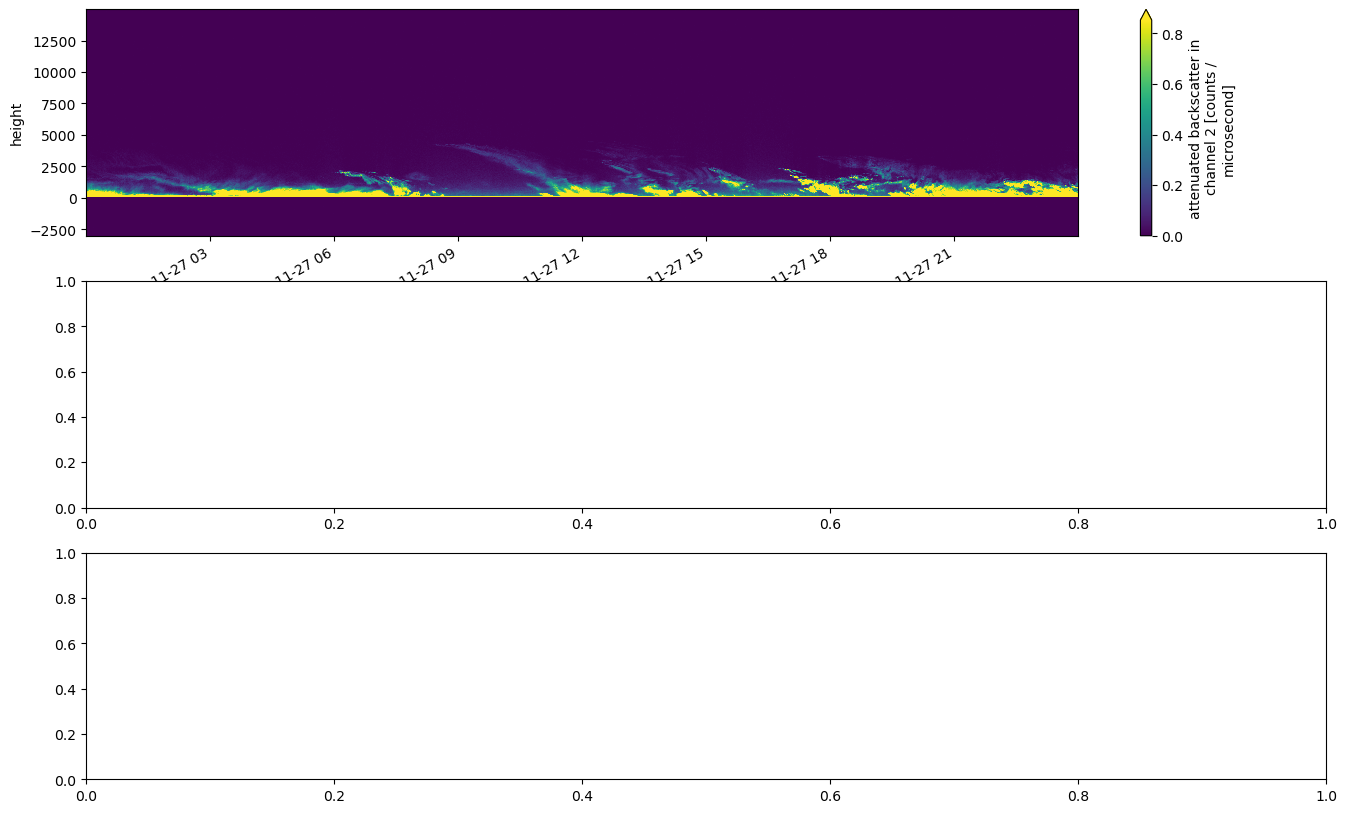

In [192]:
k = 'backscatter_2'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0], robust=True, x='time')
#ds_ingested[k].plot(ax=axs[1], robust=True, x='time')

vals = (ds_raw[k].values - ds_ingested[k].values)
ds_raw['diff2'] = (('time','height'),vals)

#ds_raw['diff2'].plot(ax=axs[2], x='time')
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

diff_dict[k] = [np.min(vals), np.max(vals)]

### lat, lon, alt vars

In [193]:
# base_time
k = 'base_time'
print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

diff_dict[k] = [ds_raw[k].values - ds_ingested[k].values]

2020-11-27T00:00:03.000000000
2020-11-27T00:00:03.000000000
0 nanoseconds


In [194]:
k = 'lon'

print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

diff_dict[k] = [ds_raw[k].values - ds_ingested[k].values]

-38.42197
-38.42197
0.0


In [195]:
k = 'alt'

print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

diff_dict[k] = [ds_raw[k].values - ds_ingested[k].values]

3200.0
3200.0
0.0


## Key Results

In [196]:
s = f"{'variable name':>15} | {'min/delta':>16} | {'max':>16}"
print(s)
print('-'*len(s))

for k,i in diff_dict.items():
    if len(i) == 2:
        print(f'{k:>15} | {i[0]:>16} | {i[1]:>16}')
    else:
        print(f'{k:>15} | {i[0]:>16} |')

  variable name |        min/delta |              max
-----------------------------------------------------
      base_time |    0 nanoseconds |
    time_offset |    0 nanoseconds |    0 nanoseconds
           hour |              0.0 |              0.0
         nshots |                0 |                0
       rep_rate |                0 |                0
         energy |              0.0 |              0.0
    initial_cbh |              0.0 |              0.0
  temp_detector |              0.0 |              0.0
 temp_telescope |              0.0 |              0.0
     temp_laser |              0.0 |              0.0
mn_background_1 |              0.0 |              0.0
sd_background_1 |              0.0 |              0.0
mn_background_2 |              0.0 |              0.0
sd_background_2 |              0.0 |              0.0
  backscatter_1 |              0.0 |              0.0
  backscatter_2 |              0.0 |              0.0
            lon |              0.0 |
        